In [37]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
#Load the dataset (update file path as needed)
df = pd.read_csv('train.csv')
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

In [40]:
#Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Top missing values:\n", missing.head(10))


Top missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


In [41]:
#Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [42]:
print("Missing after fill:\n", df.isnull().sum().sum())

Missing after fill:
 0


In [43]:
#Drop 'Id' column - not useful for prediction
df.drop(['Id'], axis=1, inplace=True)


In [44]:
#Convert categorical variables into dummy/one-hot encoded variables
df = pd.get_dummies(df, drop_first=True)



In [45]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [46]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [48]:
#Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [49]:
#Evaluate models
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 score:", r2_score(y_test, y_pred_lr))

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 score:", r2_score(y_test, y_pred_rf))

Linear Regression RMSE: 51392.6587581433
Linear Regression R2 score: 0.6556593157985715
Random Forest RMSE: 28871.65828122992
Random Forest R2 score: 0.8913250063436609


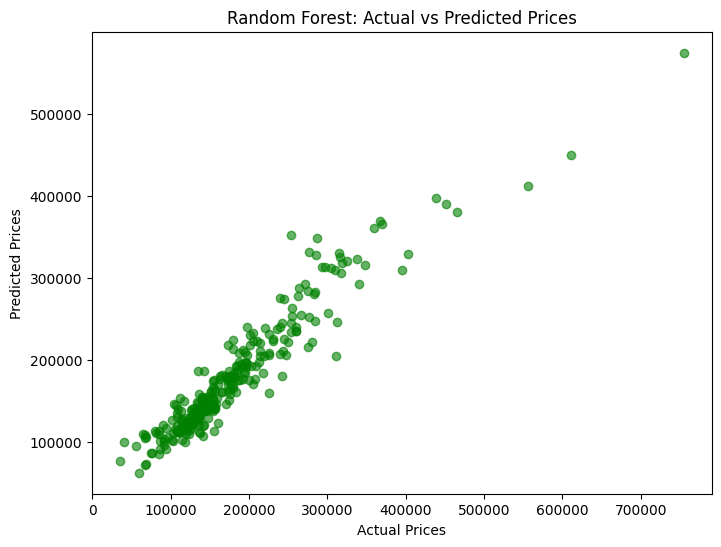

In [50]:
#Plot predicted vs actual prices for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

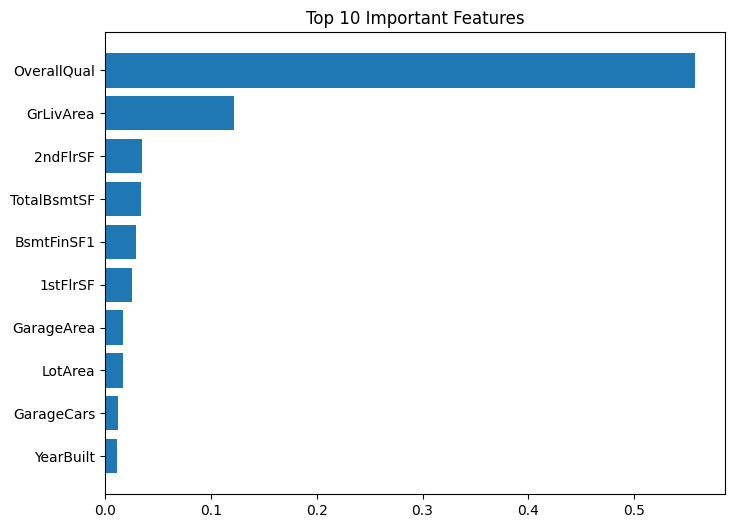

In [51]:
#Feature importance for Random Forest (Top 10)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Important Features')
plt.show()